# Pandas is Fun!

This notebook accompanies my blog post here: 

Let's start by loading our dataset!

In [1]:
import pandas as pd
import numpy as np

In [2]:
us_vaxx = pd.read_csv('us_state_vaccinations.csv')

Then we vew the data using the .head() function.

In [3]:
us_vaxx.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


We can see metadata using .info()

In [4]:
us_vaxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 9838 non-null   object 
 1   location                             9838 non-null   object 
 2   total_vaccinations                   9503 non-null   float64
 3   total_distributed                    9347 non-null   float64
 4   people_vaccinated                    9335 non-null   float64
 5   people_fully_vaccinated_per_hundred  8785 non-null   float64
 6   total_vaccinations_per_hundred       8887 non-null   float64
 7   people_fully_vaccinated              9253 non-null   float64
 8   people_vaccinated_per_hundred        8862 non-null   float64
 9   distributed_per_hundred              8874 non-null   float64
 10  daily_vaccinations_raw               9773 non-null   float64
 11  daily_vaccinations            

Let's change that date column into the datetime type!

In [5]:
us_vaxx['date'] = pd.to_datetime(us_vaxx['date'])

In [6]:
us_vaxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 9838 non-null   datetime64[ns]
 1   location                             9838 non-null   object        
 2   total_vaccinations                   9503 non-null   float64       
 3   total_distributed                    9347 non-null   float64       
 4   people_vaccinated                    9335 non-null   float64       
 5   people_fully_vaccinated_per_hundred  8785 non-null   float64       
 6   total_vaccinations_per_hundred       8887 non-null   float64       
 7   people_fully_vaccinated              9253 non-null   float64       
 8   people_vaccinated_per_hundred        8862 non-null   float64       
 9   distributed_per_hundred              8874 non-null   float64       
 10  daily_vaccin

We can filter data to find specific information we are looking for. For example, using this query we can learn what date Michigan reached 1,000,000 people fully vaccinated.

In [7]:
us_vaxx.loc[(us_vaxx['location'] == 'Michigan') & (us_vaxx['people_fully_vaccinated'] >= 1000000.0), 
            ['date', 'location', 'people_fully_vaccinated']]

,date,location,people_fully_vaccinated
4585,2021-03-08,Michigan,1002567.0
4586,2021-03-09,Michigan,1009603.0
4587,2021-03-10,Michigan,1025697.0
4588,2021-03-11,Michigan,1050447.0
4589,2021-03-12,Michigan,1082171.0
...,...,...,...
4676,2021-06-07,Michigan,4302847.0
4677,2021-06-08,Michigan,4329582.0
4678,2021-06-09,Michigan,4349940.0
4679,2021-06-10,Michigan,4376010.0


Our dataset contains quite a few missing values. Let's take a look at the daily_vaccinations column to find out what's going on:

In [9]:
us_vaxx.loc[(us_vaxx['daily_vaccinations'].isna()), ['date', 'location', 'daily_vaccinations']]

,date,location,daily_vaccinations
0,2021-01-12,Alabama,NaN
151,2021-01-12,Alaska,NaN
302,2021-01-12,American Samoa,NaN
453,2021-01-12,Arizona,NaN
604,2021-01-12,Arkansas,NaN
...,...,...,...
9083,2021-01-12,Virginia,NaN
9234,2021-01-12,Washington,NaN
9385,2021-01-12,West Virginia,NaN
9536,2021-01-12,Wisconsin,NaN


Looks like these are probably dates where no vaccinations were given, so we can fill all of these cells with 0.

In [10]:
us_vaxx['daily_vaccinations'].fillna(value=0, inplace=True)

If we only want to look at data from a specific date, we can filter those rows into their own dataframe.

In [11]:
today_data = us_vaxx.loc[(us_vaxx['date'] == '2021-06-11'), 
                         ['date', 'location', 'total_vaccinations', 'people_fully_vaccinated_per_hundred']]

In [12]:
today_data

,date,location,total_vaccinations,people_fully_vaccinated_per_hundred
150,2021-06-11,Alabama,3078445.0,29.96
301,2021-06-11,Alaska,627519.0,40.63
452,2021-06-11,American Samoa,43712.0,35.48
603,2021-06-11,Arizona,6150227.0,37.42
754,2021-06-11,Arkansas,2130617.0,32.14
...,...,...,...,...
9233,2021-06-11,Virginia,8695485.0,47.59
9384,2021-06-11,Washington,7986614.0,49.57
9535,2021-06-11,West Virginia,1351980.0,35.14
9686,2021-06-11,Wisconsin,5620419.0,46.03


The .describe() function shows summary statistics for the dataset.

In [49]:
today_data.describe()

,total_vaccinations,people_fully_vaccinated_per_hundred
count,6.500000e+01,61.000000
mean,9.694608e+06,41.951311
std,3.796815e+07,9.073530
min,2.437400e+04,21.320000
25%,1.202943e+06,35.320000
50%,3.012261e+06,41.700000
75%,6.377412e+06,47.920000
max,3.065098e+08,69.730000


We can sort our data to get more insights.

In [13]:
today_data.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False, inplace = True)

Many of Excel's most popular functions are readily available!

In [16]:
m = today_data['total_vaccinations'].mean()
s = today_data['total_vaccinations'].sum()
c = today_data['total_vaccinations'].count()

print(f'The mean of our dataset is {m}.')
print(f'The sum of our dataset is {s}.')
print(f'There are {c} rows in our dataset.')

The mean of our dataset is 9694608.123076923.
The sum of our dataset is 630149528.0.
There are 65 rows in our dataset.


Using Seaborn and Matplotlib we can create graphs of our data!

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#this line creates the style I want for my graph and the font size for the labels
sns.set(style='darkgrid', font_scale=2.5)

#this line tells matplotlib to display the graphs directly in our notebook
%matplotlib inline

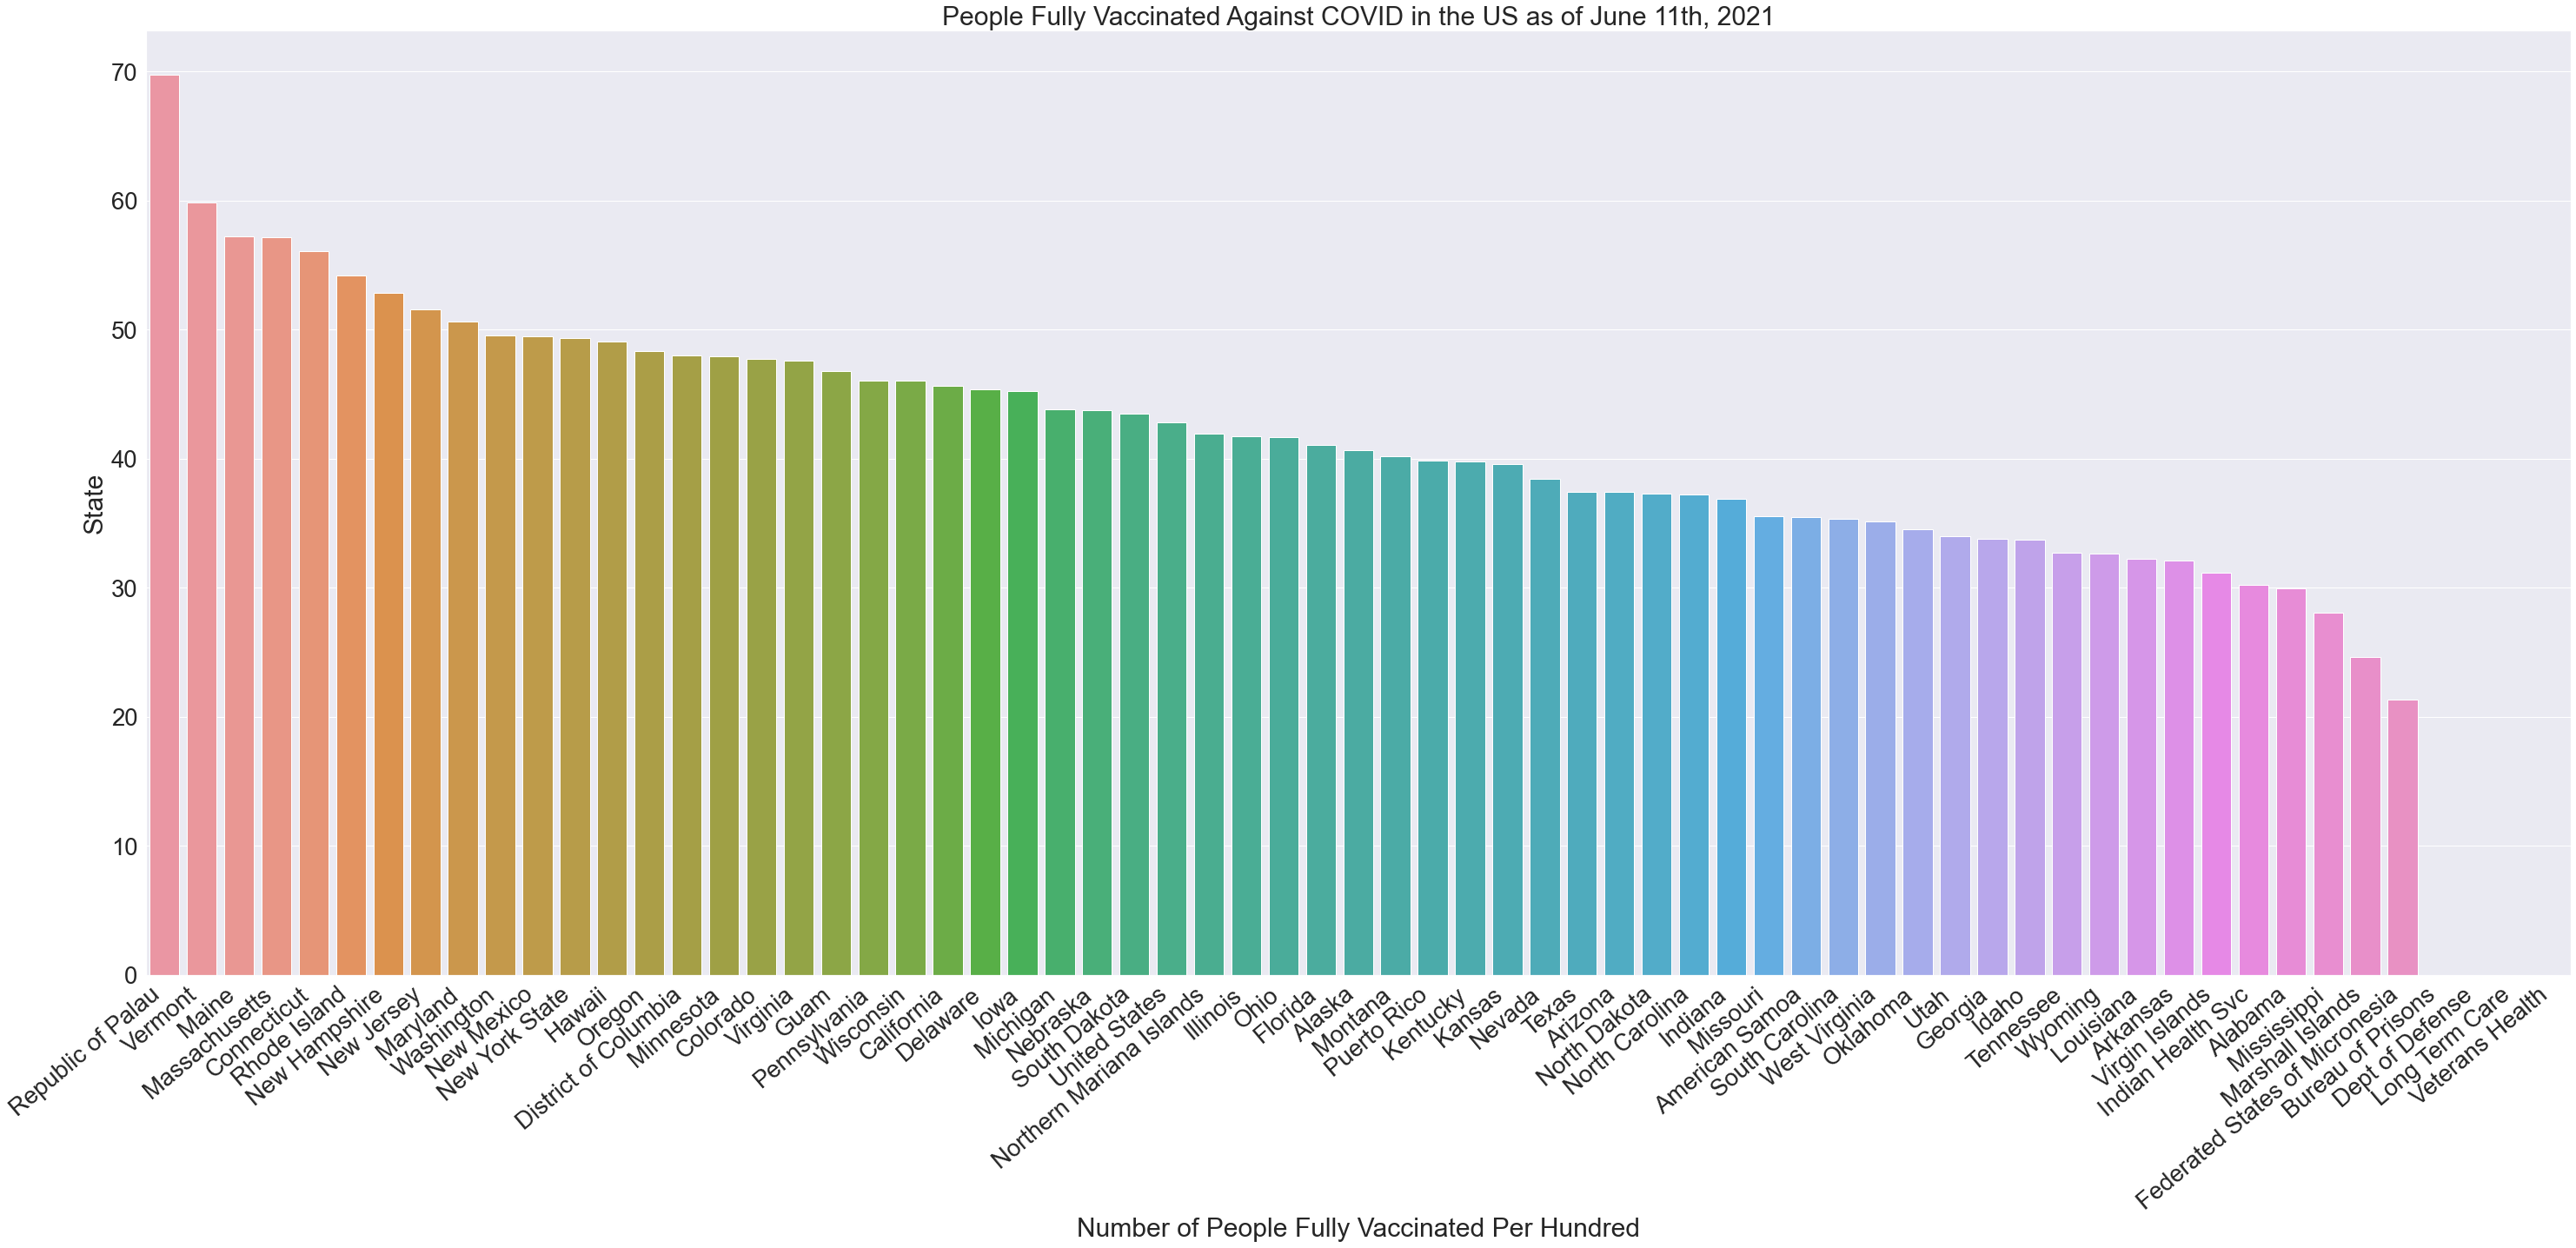

In [18]:
fig=plt.figure(figsize=(50,20))
ax = sns.barplot(data=today_data, x='location', y='people_fully_vaccinated_per_hundred')
ax.set(xlabel='Number of People Fully Vaccinated Per Hundred', ylabel='State', 
       title='People Fully Vaccinated Against COVID in the US as of June 11th, 2021')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig('Fully Vaccinated.png');

Python is such an awesome tool for exploring large and complex datasets, especially when we leverage powerful Python libraries like Pandas and Seaborn!